# YouTube视频数据分析及优化建议

![png](./pics/m.png)

## 背景分析

YouTube是世界著名的视频分享网站，它使用了一系列的方式来记录用户的交互行为，包括观看、喜欢、不喜欢、评论等行为。

数据记录了2006年到2018年的部分视频数据，视频数据按国家分类，不同国家的视频类别区分会有所不同，这里取的是US（美国）的数据。

#### DATA

数据来源：https://www.kaggle.com/datasnaek/youtube-new

VARIABLES：
- video_id                   
- trending_date               
- title                      
- channel_title              
- category_id  （int） 

 '1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'
 

- publish_time               
- tags                       
- views   （int）                  
- likes    （int）                 
- dislikes   （int）                
- comment_count    （int）         
- thumbnail_link             
- comments_disabled             
- ratings_disabled              
- video_error_or_removed        
- description



## 目标确定

对视频运营情况进行监控，并提出优化策略。

主要通过对观看、喜欢、不喜欢以及评论数等对以下四个方面进行分析：

1. 关注情况分析
2. 转化率分析
3. 质量分析
4. 词频分析

## 数据加载及预处理

In [37]:
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('USvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


### 查看各属性变量类型并检测缺失值

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


### 检测重复值并处理

In [8]:
df.duplicated().sum()

48

In [9]:
df.drop_duplicates(inplace=True)

In [14]:
df.to_csv('cleaned_videos.csv', index=False)

## 一. 关注情况分析
（某类）总次数 = 视频数量 * （某类）平均次数

- (某个类别的)观看总次数 = (这个类别的)视频数量 * (这个类别的)平均观看次数
- (某个类别的)喜欢总数 = (这个类别的)视频数量 * (这个类别的)平均喜欢次数
- (某个类别的)不喜欢总数 = (这个类别的)视频数量 * (这个类别的)平均不喜欢次数
- (某个类别的)评论总次数 = (这个类别的)视频数量 * (这个类别的)平均评论次数

从视频数量和平均行为次数的角度对用户行为（观看、喜欢、不喜欢、评论）进行分析。

### 1. 不同类别视频的关注情况分析
![png](./pics/total_num.png)

** 分析 **

类别ID为10和24的视频获得的view, likes, dislikes, 还是comments总数都是最多的。

接下来将分析是哪些原因导致这些类别的视频获得了较多的views, likes, dislikes, 和comments.

### 2. 影响因素分析
行为总次数 = 视频数量 * 平均行为次数

- (某个类别的)观看总次数 = (这个类别的)视频数量 * (这个类别的)平均观看次数
- (某个类别的)喜欢总数 = (这个类别的)视频数量 * (这个类别的)平均喜欢次数
- (某个类别的)不喜欢总数 = (这个类别的)视频数量 * (这个类别的)平均不喜欢次数
- (某个类别的)评论总次数 = (这个类别的)视频数量 * (这个类别的)平均评论次数

#### 2.1 不同类别的视频数量
![png](./pics/c_num.png)

** 分析 **

类别ID为10和24的视频数量最多，同时用户观看的大部分视频都是2018和2017最近着两年发布的。这也说明正因为这两类视频的数量多，因此与用户互动总数也最多。在总数上类别为10的要多于类别为24的视频，但类别为10的视频数量明显要少于类别为24的，因此我们还需要进一步分析不同类别互动（观看、喜欢、不喜欢、评论）的平均数。

#### 2.2 不同类别的平均观看次数
![png](./pics/c_avg_views.png)

** 分析 **

- (某个类别的)观看总次数 = (这个类别的)视频数量 * (这个类别的)平均观看次数

从平均观看次数看，前几名依次是类别ID为10、1、24、29、20的视频。

类别为1、20、29的视频平均观看次数大于平均值，但数量却小于平均值。

#### 2.3 不同类别的平均喜欢次数
![png](./pics/c_avg_likes.png)

** 分析 **

- (某个类别的)喜欢总数 = (这个类别的)视频数量 * (这个类别的)平均喜欢次数

从平均喜欢数看，前几名依次是类别ID为10、29、1、23、20的视频。

类别为1、20、29的视频平均喜欢次数大于平均值，但数量却小于平均值。

#### 2.4 不同类别的平均不喜欢次数
![png](./pics/c_avg_dislikes.png)

** 分析 **

- (某个类别的)不喜欢总数 = (这个类别的)视频数量 * (这个类别的)平均不喜欢次数

从平均不喜欢次数看，前几名依次是类别ID为29、10、20、24、22的视频。

#### 2.5 不同类别的平均评论次数
![png](./pics/c_avg_comments.png)

** 分析 **

- (某个类别的)评论总次数 = (这个类别的)视频数量 * (这个类别的)平均评论次数

从平均评论次数看，前几名依次是类别ID为29、10、20、24、22的视频。

类别为20、29的视频平均评论次数大于平均值，但数量却小于平均值。

#### 2.6 观看次数与喜欢/不喜欢的关系
![png](./pics/c_views_likes-dislikes.png)

** 分析 **

图中以圆形大小表示某个类别视频的平均观看次数，圆形面积越大表示观看的次数越多，旁边的编号代表视频的类别。

通常观看的人数越多，喜欢/不喜欢的人数也越多，但也有一些类别的视频虽然观看人数并不是最多，却能调动用户的情绪，引起用户点喜欢或不喜欢。

#### 2.7 评论次数与喜欢/不喜欢的关系
![png](./pics/c_comments_likes-dislikes.png)

** 分析 **

通常情况下喜欢/不喜欢的人数越多，评论数量也会越多，几乎没有意外。说明一旦调动了用户情感就能使他们进行评论。

用户观看视频并不一定会让他们点击喜欢或不喜欢，但一旦他们喜欢或不喜欢某个视频就容易产生评论。相对观看数而言，评论数更能反映用户对视频喜欢或不喜欢。

## 二. 转化率分析

用户视频观看数（view）非常重要，但是有的时候用户可能只是误点击了视频，所以分析喜欢/不喜欢点击率、评论转换率也是非常重要的。

通过监控转换率还可以检测异常情况，防止僵尸点击和水军评论。

- 喜欢点击率 = likes数量 / views数量
- 不喜欢点击率 = dislikes数量 / views数量
- 评论转化率 = comments数量 / views数量

### 1. “喜欢”点击率
![png](./pics/rate_likes.png)

** 分析 **

用户看过视频后会点击喜欢的比率最小的是类别ID为25、17、2的视频。因此可以着重提高这几类视频的点赞数。

### 2. “不喜欢”点击率
![png](./pics/rate_dislikes.png)

** 分析 **

用户看过视频后会点击不喜欢的比率最大的是类别ID为29和25的视频。

### 3. 评论转化率
![png](./pics/rate_comments.png)

** 分析 **

用户看过视频后会进行评论的比率最小的是类别ID为20、29、25的视频。因此可以着重提高这几类视频的评论数。

### 3. 不同发布时间的视频转换率
#### 3.1 2006~2018发布的视频
![png](./pics/rate_year.png)

** 分析 **

从前面的分析我们可以知道喜欢或者不喜欢都会导致评论数的增加。2011年和2017年发布的视频是带来了两个评论高峰，而不同的是2011年造成的评论高峰很大一部分原因是不喜欢的人数较多，2017年大部分原因则是喜欢的人数较多。

#### 3.2 2017～2018最近一年发布的视频
![png](./pics/rate_month.png)

** 分析 **

在最近一年中的各转化率存在一定的波动，在波动中有小幅度上涨。其中2017年9月份各项指标最低，2018年6月最高。

而造成这些的原因与视频质量分不开，接下来将分析视频的质量。

## 三. 质量分析

likes所占百分比 = likes数量 /（likes数量+dislikes数量）

### 1. 各类别视频质量
![png](./pics/value_c.png)

** 分析 **

低于平均值的有类别:2（0.9068），17（0.9098），19（0.9275），24（0.9239），25（0.7889），29（0.9242），其中最低的是类别25（0.7889）。因此要重点监控类别为25的视频质量。


### 2. 各渠道视频质量
![png](./pics/value_title.png)

** 分析 **

上图表示likes所占百分比最低的10个渠道，因此我们需要重点监控Daily Caller, JS, Roy Moore for Senate这几个频道的质量。

### 3. 不同发布年份视频的质量
![png](./pics/value_y.png)
![png](./pics/value_m.png)

** 分析 **

2013年前的视频质量波动较大，之后虽有波动但波动较小。最近一年的视频质量（平均值为0.9290）也比过去十年（平均值为0.9016）的视频质量要高。

### 3. 出错或被删除视频分析
#### 3.1 出错或被删除视频所占比例
![png](./pics/er.png)

** 分析 **

错误或被移除的视频占0.06%（图中饼图用了不同颜色标示，但由于太小而不易察觉）。

#### 3.2 出错或被删除视频所在的类别
![png](./pics/er_c.png)

** 分析 **

出错或被删除视频主要集中在类别为1、11、24中。

#### 3.3 出错或被删除视频所在的频道
![png](./pics/er_t.png)


** 分析 **

进一步分析，出错或被删除视频在1类别中的googledoodles和Midnight频道中，在17类别中的DaHoopSpot Productions频道中，在24类别的Cobra Kai和Verizon频道中。

#### 3.3 出错或被删除视频发布年份
![png](./pics/er_y.png)

** 分析 **

出错或被删除视频发布时间集中在2017和2018年中。

## 四. 词云分析视频相关文本信息

主要分析Title, Channel-Title, Tags, Description中的文本进行

In [27]:
df_c = pd.read_csv('cleaned_videos.csv')

### 1. Title

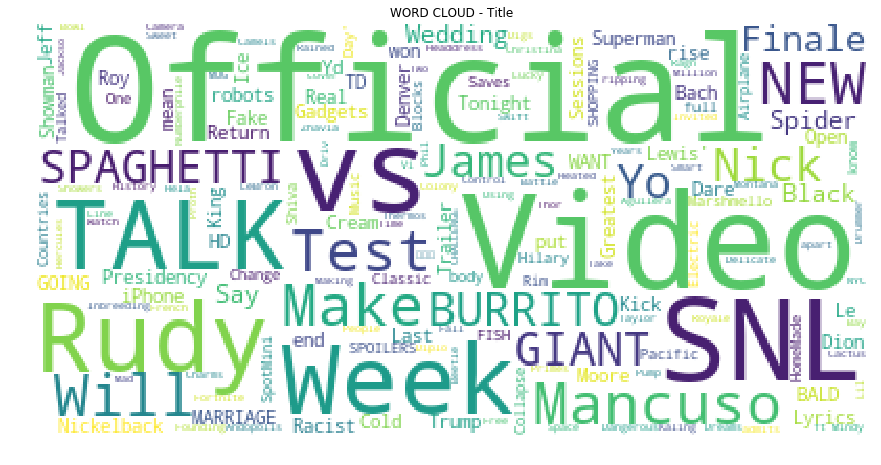

In [38]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=70, 
                          random_state=42
                         ).generate(str(df_c['title']))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Title")
plt.axis('off')
plt.show()

** 分析 ** 

视频title中出现最多的词是：official，talk, VS, video, rudy, week, SNL

### 2. Channel Title

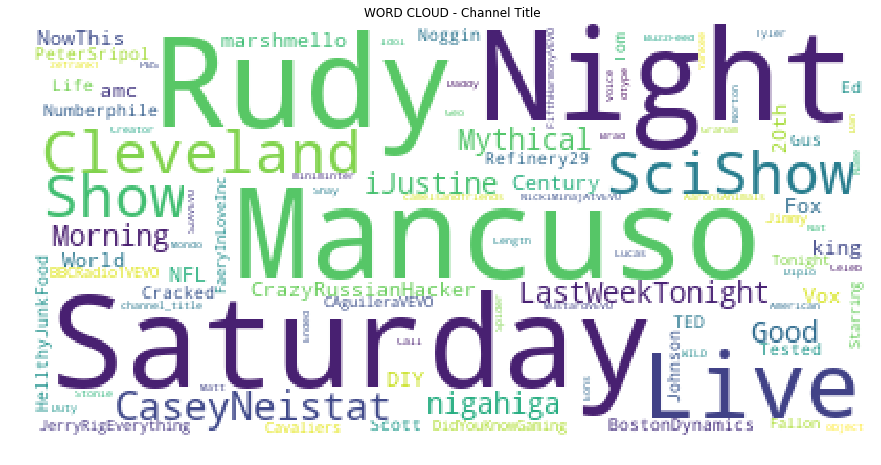

In [32]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(df_c['channel_title']))


fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Channel Title")
plt.axis('off')
plt.show()

** 分析 ** 

Channel Title中出现最多的词是：Rudy，night，Mancuso，Saturday，Live

### 3. Tags

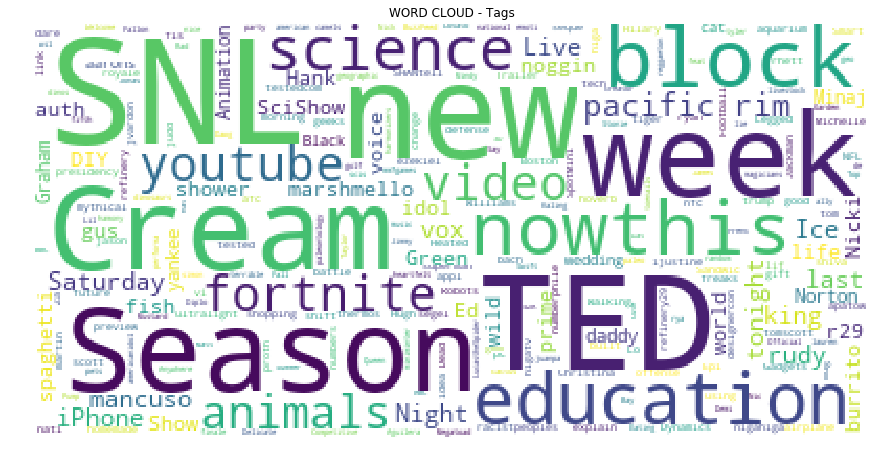

In [39]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=70, 
                          random_state=42
                         ).generate(str(df_c['tags']))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Tags")
plt.axis('off')
plt.show()

** 分析 ** 

Tags中出现最多的词是：SNL，new，week，Cream Season，TED，education

### 4. Description

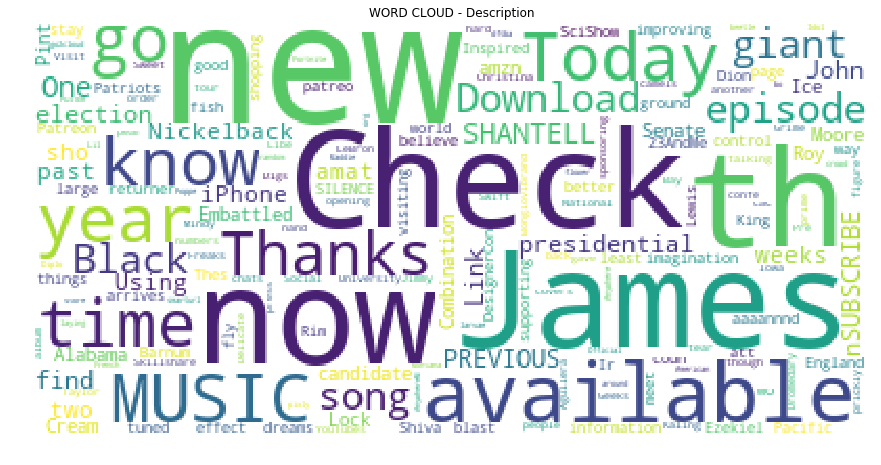

In [31]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']

stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(df_c['description']))

#print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Description")
plt.axis('off')
plt.show()

** 分析 ** 

Description中出现最多的词是：new，Check，now，James，MUSIC，avalilable

## 总结/建议

### 一. 关注情况分析
1. 平均观看、喜欢、不喜欢、和评论数都较高的视频类别有：10、29、1、20、22、24，因此可以多向用户推荐这几类视频。
2. 从数量上来看，只有类别为10和24的视频数量相对其他类别更多，因此我们可以想办法多提高29、1、20、22类别的视频数量，特别是类别为29的视频数量非常少。这样能提高总的观看、喜欢、不喜欢、和评论数。
3. 用户大多数观看的都是2018和2017近两年发布的视频，可见实效性非常重要。
4. 相对观看数而言，评论数更能反映用户对视频喜欢或不喜欢。

### 二. 转化率分析
1. 类别为25、17、2的视频喜欢点击率较低，因此可以着重提高这几类视频的点赞数。
2. 类别为17、2、19、1的视频评论转化率较低，因此可以着重提高这几类视频的评论数。
3. 不同发布时间的视频转换率呈波动状态，近一年（2017～2018）得到大幅提升

### 三. 视频质量分析
1. 类别为25的视频质量最差，因此需重点监控。
2. Daily Caller, JS, Roy Moore for Senate这几个频道的质量最差，因此需重点监控。
3. 最近一年视频质量的稳定性更大，质量更优。
4. 出错或被删除视频发布时间集中在2017和2018年，占总体的0.06%。分布在1类别中的googledoodles和Midnight频道中，在17类别中的DaHoopSpot Productions频道中，在24类别的Cobra Kai和Verizon频道中。

### 四. 词云分析视频相关文本信息
1. Title中出现最多的词是：official，talk, VS, video, Rudy, week, SNL
2. Channel Title中出现最多的词是：Rudy，night，Mancuso，Saturday，Live
3. Tags中出现最多的词是：SNL，new，week，Cream Season，TED，education
4. Description中出现最多的词是：new，Check，now，James，MUSIC，avalilable